In [1]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
path1 = "q2train.xlsx"
path2 = "q2test.xlsx"

In [3]:
wrk1 = xlrd.open_workbook(path1)
train_d = wrk1.sheet_by_index(0)

In [4]:
wrk2 = xlrd.open_workbook(path2)
test_d = wrk2.sheet_by_index(0)

In [5]:
train_d.nrows

71

In [6]:
train_d.ncols

3

In [7]:
test_d.nrows

31

In [8]:
test_d.ncols

2

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(1, 71):
    l = []
    l.append(1.0)
    l.append(train_d.cell_value(i, 0))
    l.append(train_d.cell_value(i, 1))
    y_train.append(train_d.cell_value(i, 2))
    x_train.append(l)

In [11]:
x_test = []

In [12]:
for i in range(1, 31):
    lt = []
    lt.append(1.0)
    lt.append(test_d.cell_value(i, 0))
    lt.append(test_d.cell_value(i, 1))
    x_test.append(lt)

In [13]:
m = len(x_train)
m

70

In [14]:
p = len(x_train[0])
p

3

In [15]:
n = len(x_test)
n

30

In [16]:
pt = len(x_test[0])
pt

3

In [17]:
lx0_train = []
lx1_train = []
lx2_train = []

In [18]:
for i in range(m):
    lx0_train.append(x_train[i][0])
    lx1_train.append(x_train[i][1])
    lx2_train.append(x_train[i][2])

In [19]:
x1_max = max(lx1_train)
x1_min = min(lx1_train)
x1_max, x1_min

(99.37252693, 30.15882245)

In [20]:
lx1n_train = []
for i in range(m):
    lx1n_train.append(((lx1_train[i] - x1_min)/(x1_max - x1_min)))

In [21]:
x2_max = max(lx2_train)
x2_min = min(lx2_train)
x2_max, x2_min

(99.37252693, 30.15882245)

In [22]:
lx2n_train = []
for i in range(m):
    lx2n_train.append(((lx2_train[i] - x2_min)/(x2_max - x2_min)))

In [23]:
lx0_test = []
lx1_test = []
lx2_test = []

In [24]:
for i in range(n):
    lx0_test.append(x_test[i][0])
    lx1_test.append(x_test[i][1])
    lx2_test.append(x_test[i][2])

In [25]:
x1_maxt = max(lx1_test)
x1_mint = min(lx1_test)
x1_maxt, x1_mint

(99.9278578, 32.82283304)

In [26]:
lx1n_test = []
for i in range(n):
    lx1n_test.append(((lx1_test[i] - x1_mint)/(x1_maxt - x1_mint)))

In [27]:
x2_maxt = max(lx2_test)
x2_mint = min(lx2_test)
x2_maxt, x2_mint

(96.74742717, 35.67070347)

In [28]:
lx2n_test = []
for i in range(n):
    lx2n_test.append(((lx2_test[i] - x2_mint)/(x2_maxt - x2_mint)))

In [29]:
def matrixmulti(theta, lx0, lx1, lx2, m):
    
    hx = []
    
    for i in range(m):
        x0t0 = lx0[i]*theta[0]
        x1t1 = lx1[i]*theta[1]
        x2t2 = lx2[i]*theta[2]
        hx.append(x0t0 + x1t1 + x2t2)
        
    return hx

In [30]:
def sig(hx, m):
    
    hx1 = np.array(hx)
    hx2 = np.reshape(hx1, (m, 1))
    s = 1/(1 + np.exp(-hx2))

    s1 = []
    for i in range(m):
        s1.append(s[i][0])
        
    return s1

In [31]:
def calcost(theta, lx0, lx1, lx2, m, Y):
    
    gx = matrixmulti(theta, lx0, lx1, lx2, m)
    hx = sig(gx, m)
    
    costlog = 0.0 
    for i in range(m):
        costlog = costlog - ((Y[i]*np.log(hx[i])) + ((1 - Y[i])*np.log(1 - hx[i])))
        
    return costlog

In [32]:
ep = 0

In [33]:
alpha = 0.001

In [34]:
theta = [0.0, 0.0, 0.0]
theta

[0.0, 0.0, 0.0]

In [35]:
costl = []

In [36]:
cost = 1.0

In [37]:
start = time.time()
while ep<10000:
    
    sub_train = []
    gx_train = matrixmulti(theta, lx0_train, lx1n_train, lx2n_train, m)
    hx_train = sig(gx_train, m)
    
    for i in range(m):
        sub_train.append(y_train[i] - hx_train[i])

    sum0_train = 0.0
    sum1_train = 0.0
    sum2_train = 0.0
    for i in range(m):
        sum0_train = sum0_train + sub_train[i]*lx0_train[i]
        sum1_train = sum1_train + sub_train[i]*lx1n_train[i]
        sum2_train = sum2_train + sub_train[i]*lx2n_train[i]
        
    mul0_train = alpha*sum0_train
    mul1_train = alpha*sum1_train
    mul2_train = alpha*sum2_train
    
    theta[0] = theta[0] + mul0_train
    theta[1] = theta[1] + mul1_train
    theta[2] = theta[2] + mul2_train
    
    cost = calcost(theta, lx0_train, lx1n_train, lx2n_train, m, y_train)
    costl.append(cost)
    
    ep = ep + 1

end = time.time()
print("time taken to converge = ", end-start)

time taken to converge =  4.5286948680877686


In [38]:
theta

[-3.2896940314747503, 5.763351011731899, 1.0885007714121313]

In [39]:
def predict(theta, lx0, lx1, lx2, m):
    
    y_predict = []
    for i in range(m):
        x0 = float(lx0[i])
        x1 = float(lx1[i])
        x2 = float(lx2[i])
        g = x0*theta[0]+ x1*theta[1] + x2*theta[2]
        z = 1/(1 + np.exp(-g))
        if(z>0.5):
            y_predict.append(1.0)
        else:
            y_predict.append(0.0)
    
    return y_predict

In [40]:
y_predict = predict(theta, lx0_train, lx1n_train, lx2n_train, m)

In [41]:
count = 0
for i in range(m):
    if y_predict[i] == y_train[i]:
        count = count + 1 

In [42]:
print("accuracy = ", (count/m)*100)

accuracy =  81.42857142857143


In [43]:
y_predictt = predict(theta, lx0_test, lx1n_test, lx2n_test, n)

# Graphs

In [44]:
c = -theta[0]/theta[2]
c

3.0222248048634563

In [45]:
slope = -theta[1]/theta[2]
slope

-5.294760613035673

In [46]:
x1n_max = max(lx1n_train)
x1n_min = min(lx1n_train)
x1n_max, x1n_min

(1.0, 0.0)

In [47]:
x2n_max = max(lx2n_train)
x2n_min = min(lx2n_train)
x2n_max, x2n_min

(1.0, 0.0)

In [48]:
X2f = []
for i in range(m):
    X2f.append([lx1n_train[i], lx2n_train[i]])

In [49]:
X2fn = np.array(X2f)

In [50]:
Yn = np.array(y_train)

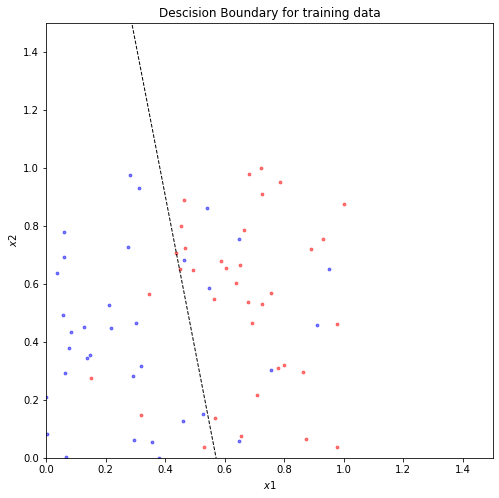

In [51]:
fig = plt.figure(figsize = (8, 8))
xl = np.array([x1n_min, x1n_max + 0.5])
yl = slope*xl + c
plt.plot(xl, yl, "k", lw = 1, ls = "--")

plt.scatter(*X2fn[Yn==0.0].T, s = 8, color = "blue", alpha = 0.5)
plt.scatter(*X2fn[Yn==1.0].T, s = 8, color = "red", alpha = 0.5)
plt.xlim(x1n_min, x1n_max + 0.5)
plt.ylim(x2n_min, x2n_max + 0.5)
plt.ylabel(r'$x2$')
plt.xlabel(r'$x1$')
plt.title("Descision Boundary for training data") 
plt.show()

In [52]:
X2ft = []
for i in range(n):
    X2ft.append([lx1n_test[i], lx2n_test[i]])

In [53]:
X2fnt = np.array(X2ft)

In [54]:
Ynt = np.array(y_predictt)

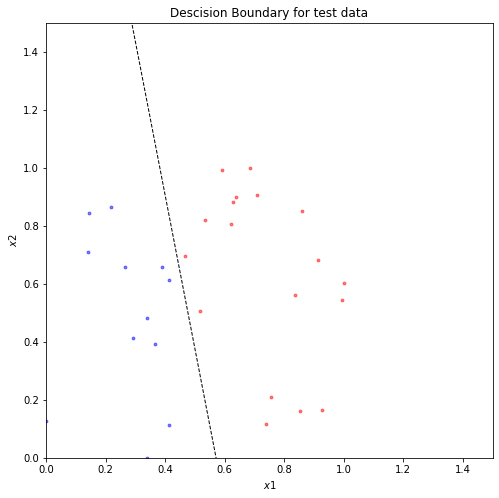

In [55]:
fig = plt.figure(figsize = (8, 8))
xlt = np.array([0.0, 1.5])
ylt = slope*xlt + c
plt.plot(xlt, ylt, "k", lw = 1, ls = "--")

plt.scatter(*X2fnt[Ynt==0.0].T, s = 8, color = "blue", alpha = 0.5)
plt.scatter(*X2fnt[Ynt==1.0].T, s = 8, color = "red", alpha = 0.5)
plt.xlim(0.0, 1.5)
plt.ylim(0.0, 1.5)
plt.ylabel(r'$x2$')
plt.xlabel(r'$x1$')
plt.title("Descision Boundary for test data") 
plt.show()

In [56]:
#cost of logistic regression
len(costl)

10000

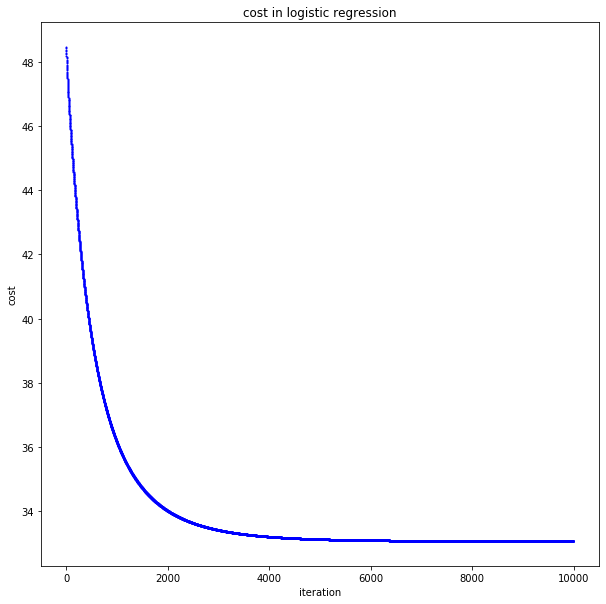

In [58]:
fig = plt.figure(figsize = (10, 10))
x_c = list(range(10000))
plt.scatter(x_c, costl, s = 1, c = "b")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost in logistic regression")
plt.show()